# REDUCCIÓN DE DIMENSIONALIDAD en vowel data

Para esta sección se trabaja con vowel data la cual consta de predecir la vocal fonética correspondiente a unas características de frecuencia. El conjunto de datos posee un input correspondiente a 10 características las cuales representan a un periodograma de frecuencias, además de indicar el target(y) el cual corresponde a la etiqueta/clase de la vocal fonética correspondiente.

Son 11 vocales del inglés británico codificada en números del 1 hasta el 11, cada vocal tiene asociada una palabra que la representa:

|Etiqueta  |Vocal   | Palabra|
| :---- | :----- | :------ |
|1|  i: |      heed |
|2|  E  |      head|
|3|  a: |     hard|
|4|  O  |      hod|
|5|  U  |      hood|
|6|  3: |     heard|
|7|  I  |      hid|
|8|  A   |     had|
|9|  Y   |      hud|
|10|  C:  |   hoard|
|11 | u:  |   who'd|

### A)

In [1]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [5]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [3]:
train_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [2]:
print "TRAINING SET"
print train_df.shape
print "el numero de vocales promedio por clase es: %f"%(train_df.shape[0]/11.0)
print "TEST SET"
print test_df.shape
print "el numero de vocales promedio por clase es: %f"%(test_df.shape[0]/11.0)

TRAINING SET
(528, 11)
el numero de vocales promedio por clase es: 48.000000
TEST SET
(462, 11)
el numero de vocales promedio por clase es: 42.000000


En las celdas superiores se cargó la data desde la web de los autores, mostrando secciones del training set y del test set.
La cantidad de registros que posee el training set es de 528 y del test set corresponde a 462. El número promedio de registros por cada clase (cada vocal) es de 48 para el training set y 42 para el test set, teniendo muy pocos datos para representar las clases.

### B)

In [3]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)

En la celda anterior se normalizan los datos para centrarlos y dejarlos preparados para realizar la reducción de dimensionalidad. Este punto es de suma importancia para la reducción ya que los datos deben estar centrados en el espacio para poder realizar la proyección, es un paso necesario para los métodos PCA y LDA.

### C)

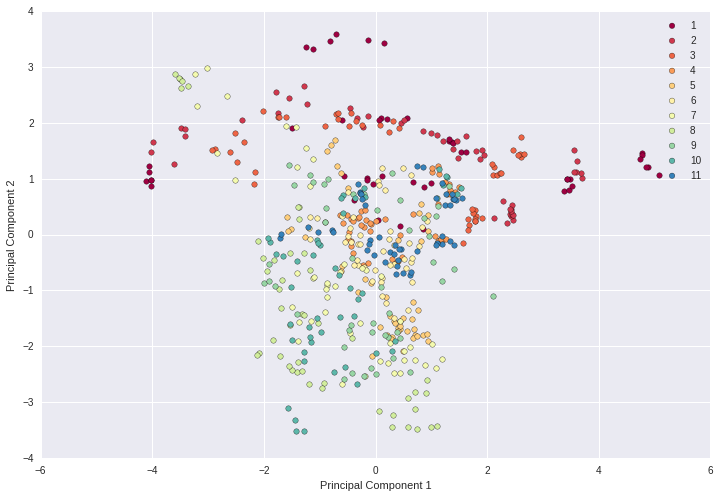

In [9]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Spectral") 
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],s=30,label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Este gráfico presentado es la representación visual de la transformación PCA del dataset vowel, con 10 características (10 dimensiones), a este espacio de 2 características (2 dimensiones).

### D)

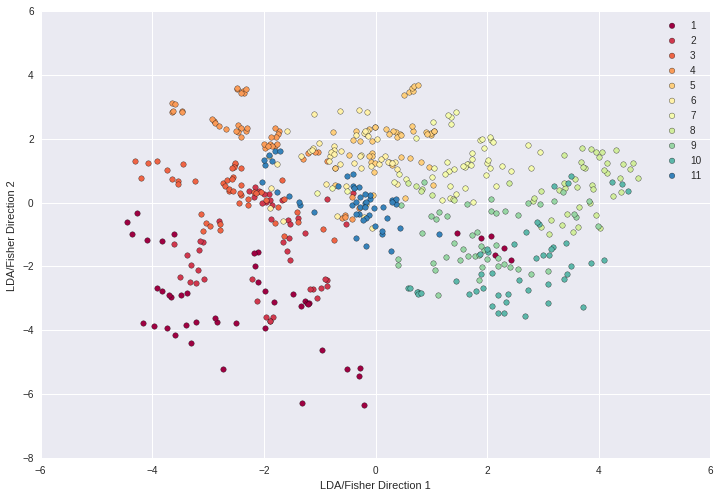

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col,s=30)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Este gráfico presentado es la proyecció del dataset vowel, con 10 características (10 dimensiones), a este espacio de 2 características (2 dimensiones) mediante la tecnica LDA. Se ve una clara diferencia en la orientacion de los datos, estando distribuidos mas extendidos sobre la primera dirección de LDA.

### E)

En base a estos 2 gráficos presentados anteriormente (gráfico 1 PCA y gráfico 2 LDA), se puede ver una clara diferencia en su orientación en los datos, tomando un comportamiento diferente. En el gráfico 1 se obtienen datos más cercanos entre sí, estando las clases mezcladas en una orientacion circular cercano al centro del eje (0,0). Gracias a la distinción de cada clase con cada color distinto se puede ver que los datos de la misma clase (mismo color) no están cercanos entre sí.  
Para el gráfico 2 se obtienen datos en una orientación más extendidas, ya que los rangos de los ejes son mayores a los del gráfico 1, esto muestra que los datos están más dispersos a lo largo del plano, algo esperado ya que LDA maximiza esta separación entre clases. Otra característica es que en este gráfico los datos que son de la misma clase están más agrupados entre sí que en el primer gráfico, esto es posible visualizar ya que los datos del mismo color están mas agrupados entre sí. Con esto presentado se ve el efecto que tiene LDA al maximizar la varianza entre las clases (_intra-clases_), separándolas entre si, de ahí la orientiación mas dispersa entre clases, además de minizar la varianza de la clase (_inter-clases_), agrupando los datos de la misma clase.

Para elegir entre estas dos técnicas de reducción de dimensionalidad lo primero es definir cuál es el fin del uso de este, ya que si se tiene el objetivo de tener una simple representación visual de los datos se recomienda utilizar PCA por el menor costo computacional. Si se tiene el objetivo de proyectar los datos en un espacio donde sean linealmente separables, se recomienda utilizar LDA por su propósito implícito de separar los datos de distintas clases entre sí. Va depender fuertemente cuál técnica utilizar (PCA o LDA), en clasificación, de la varianza de los datos entre las clases, ya que mientras más separadas las clases entre sí, es un mejor espacio de proyección para separar las clases y asignar un clasificador óptimo.

El método que se propone es en elegir la técnica que se comporte mejor en el peor caso, es decir, la técnica que reduzca a un espacio donde separe mejor a las 2 clases mas juntas, traducido esto a una función matemática es en seleccionar la técnica que maximice la mínima varianza entre 2 clases cualesquiera en la proyección.

### F)

In [54]:
import numpy as np
def clasificar(prob):
    E = 0
    for i in range(len(prob)):
        E += (i+1)*prob[i]
    return E

def detalle(prob):
    a = [["i:" , "E", "a:", "O", "U", "3:", "I", "A", "Y", "C:", "u:"],range(1,12),prob]
    table =  zip(*a)
    from tabulate import tabulate
    print tabulate(table, headers=["Vocal","Clase","Probabilidad"],  tablefmt="rst")
def clasificar_2(y):
    frecuencia =  np.bincount(y) [1:]
    etiquetas = list(set(y))
    total = float(sum(frecuencia))
    prob = [i/total for i in frecuencia]
    detalle(prob)
    print frecuencia
    return np.random.choice(etiquetas,p=prob)

#etiquetas = range(1,12)
print "El valor esperado para un elemento x según el clasificador basado en probabilidad es: %f"%clasificar_2(y)

=======  =======  ==============
Vocal      Clase    Probabilidad
=======  =======  ==============
i:             1       0.0909091
E              2       0.0909091
a:             3       0.0909091
O              4       0.0909091
U              5       0.0909091
3:             6       0.0909091
I              7       0.0909091
A              8       0.0909091
Y              9       0.0909091
C:            10       0.0909091
u:            11       0.0909091
=======  =======  ==============
[48 48 48 48 48 48 48 48 48 48 48]
El valor esperado para un elemento x según el clasificador basado en probabilidad es: 2.000000


Este clasificador en base a la probabilidad de que cada clase aparezca en el training set se construyó en base a la frecuencia de cada vocal, y luego dividiendo esta frecuencia en el total de datos para así construir la probabilidad. Para este caso como todas las clases aparecen una misma cantidad de veces (48 veces cada una en el training set), la probabilidad asignada para cada clase es la misma, es decir son equiprobables con un 9% de probabilidad para cada clase. Este clasificador nos muestra que cada vez que intente predecir un $x$ a priori, solo se basará en la probabilidad de las clases, es decir, cada clase será posible ser asignada al valor $x$ con una probabilidad de 9%, por lo que no se tiene preferencia por ninguna en especial y no clasifica en base al training set, ya que la clase que se entrega en base a la probabilidad es de manera aleatoria, sin importar los valores de $x$.

Se puede ver que cada vez que el código de la celda anterior se ejecute entregará una predicción distinta para un elemento $x$ cualquiera.

### G)

El score de LDA en training test es: 0.683712
El score de LDA en test set es: 0.452381
El score de QDA en training test es: 0.988636
El score de QDA en test set es: 0.415584
El score de k-NN en training test es: 0.931818
El score de k-NN en test set es: 0.491342


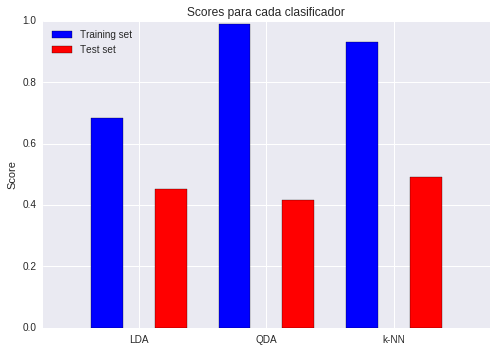

In [43]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier

lda_model = LDA()
lda_model.fit(X_std,y)
print "El score de LDA en training test es: %f"% lda_model.score(X_std,y)
print "El score de LDA en test set es: %f"% lda_model.score(X_std_test,ytest)

qda_model = QDA()
qda_model.fit(X_std,y)
print "El score de QDA en training test es: %f"% qda_model.score(X_std,y)
print "El score de QDA en test set es: %f"% qda_model.score(X_std_test,ytest)

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "El score de k-NN en training test es: %f"% knn_model.score(X_std,y)
print "El score de k-NN en test set es: %f"% knn_model.score(X_std_test,ytest)

a = [lda_model.score(X_std,y),lda_model.score(X_std_test,ytest), qda_model.score(X_std,y),qda_model.score(X_std_test,ytest)]
a += [knn_model.score(X_std,y), knn_model.score(X_std_test,ytest)]

fig, ax = plt.subplots()

barlist= ax.bar(range(6), a, width  = 0.5, align = "center", color = ['b','r','b','r','b','r'])
ax.set_ylabel('Score')
ax.set_title('Scores para cada clasificador')
ax.set_xticks([0.5,2.5,4.5])
ax.set_xticklabels(('LDA', 'QDA', 'k-NN'))
ax.legend( barlist,["Training set","Test set"], loc = 2)
plt.show()

Para el caso del _training set_ el método que mejor se comporta es el QDA, ajustándose con una precisión de 98,8%, siendo una medición bastante buena, esto es debido a sus fronteras cuadráticas, donde estas se ajustan de una manera excepcional para el _training set_, separando las clases de una manera implecable. Para el caso del _test set_ el método que mejor se comporta es el k-NN (con 10 vecinos), ya que entrega una precisión de 49%.

Se puede ver en el gráfico cómo el método de LDA es el que presenta una menor diferencia entre el desempeño sobre el _training set_ y el _test set_, comportándose de una manera en la que su desempeño no depende en gran parte del set al cual se le enfrente. Esto es un buen indicador ya que se puede decir que es el que menos genera un $overfitting$. Los métodos de QDA y k-NN al tener esta gran diferencia entre su desempeño se puede decir que generan un $overfitting$, es decir, se ajustan mucho al _training set_ entregando un resultado muy bueno sobre este y un no tan buen resultado sobre el _test set_, en especial el método QDA el cual se comporta muy bien sobre el training set y sobre el test set no entrega estos resultados.

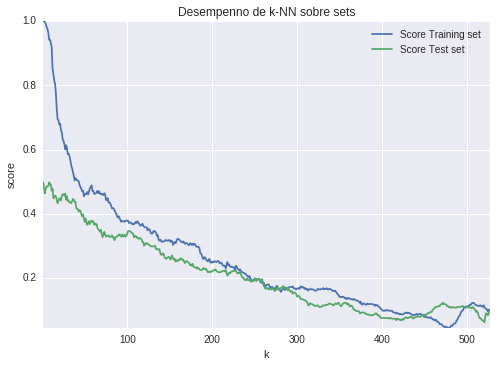

In [44]:
scores_train = []
scores_test = []
n_max = X_std.shape[0] #tamanno del dataset
for i in range(1,n_max):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_std,y)
    
    scores_train += [knn_model.score(X_std,y)]
    scores_test += [knn_model.score(X_std_test,ytest)]
    
import matplotlib.pyplot as plt
plt.plot(range(1,n_max),scores_train, label = "Score Training set")
plt.plot(range(1,n_max),scores_test, label = "Score Test set")

#plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.title('Desempenno de k-NN sobre sets')
plt.axis('tight')
plt.legend()
plt.show()

En este gráfico presentado se puede ver cómo varía el desempeño del clasificador k-NN en función de su parámetro $k$ (número de vecinos), mostrando un buen desempeño sobre ambos (_test set_ y _training set_) cuando el parámetro $k$ es bajo, menor a 100 y cuando la cantidad de vecinos es muy grande este presenta un mal comportamiendo. Cuando la cantidad de vecinos disminuye (menor a 50) este genera un $overfitting$ ya que se ajusta con un buen desempeño sobre el training set, no siendo así sobre el test set.

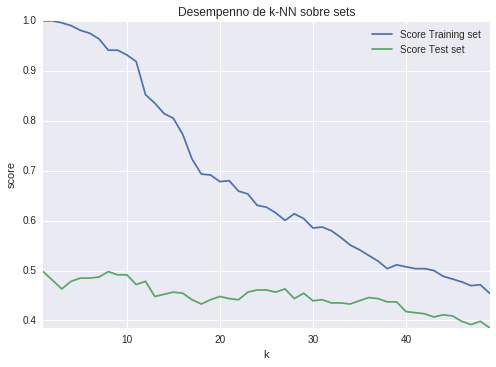

In [45]:
scores_train = []
scores_test = []
n_max = 50
for i in range(1,n_max):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_std,y)
    
    scores_train += [knn_model.score(X_std,y)]
    scores_test += [knn_model.score(X_std_test,ytest)]
    
import matplotlib.pyplot as plt
plt.plot(range(1,n_max),scores_train, label = "Score Training set")
plt.plot(range(1,n_max),scores_test, label = "Score Test set")

#plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.title('Desempenno de k-NN sobre sets')
plt.axis('tight')
plt.legend()
plt.show()

En este gráfico se aprecia cuando el parámetro $k$ varía desde 0 a 50. Se puede ver un cambio brusco sobre el _training set_, ya que a medida que aumenta el número de vecinos el desempeño cae draśticamente, esto se produce ya que al ir añadiendo más vecinos para predecir el modelo esto lo empeora debido a que los vecinos que se añaden al ajuste resultan incorrectos.  
Se puede ver que cuando el número de vecinos es menor a 30 se produce un $overfitting$ en aumento. Es esperado que este método se comporte correctamente cuando el vecindario es pequeño sobre ya que ese vecindario será la mayoría de la clase dominante.

### H)

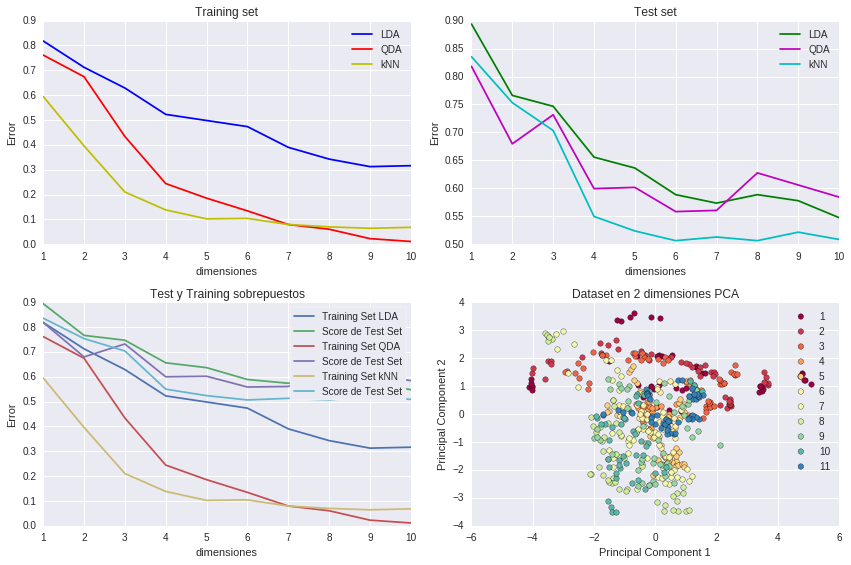

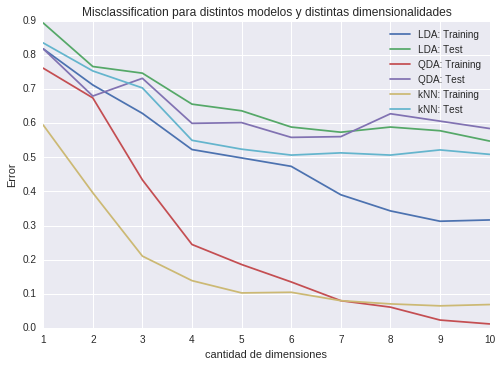

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def error(model,x,y,xt,yt):
    model.fit(x,y)
    yhat = model.predict(x)
    yhat_test = model.predict(xt)
    error = mis_clas(yhat,y)
    test_error = mis_clas(yhat_test,yt)
    return error, test_error
def mis_clas(yhat,y): #medir el error
    miss = [ 1 if(i != j) else 0  
            for i,j in zip(yhat,y)]
    return np.mean(miss) 

scores_lda =[]
scores_lda_test =[]
scores_qda =[]
scores_qda_test =[]
scores_knn =[]
scores_knn_test =[]

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)
for n in range(1,11):
    sklearn_pca = PCA(n_components=n)
    Xpca = sklearn_pca.fit_transform(X_std,y) #dataset reducido a n dimensiones
    Xpca_test = sklearn_pca.transform(X_std_test) 
    
    #LDA
    lda_model.fit(Xpca,y) #modelo se ajusta a la data en espacio reducido de n dimensiones
    yhat = lda_model.predict(Xpca)
    yhat_test = lda_model.predict(Xpca_test)
    scores_lda.append(mis_clas(yhat,y))
    scores_lda_test.append(mis_clas(yhat_test, ytest))
    
    #QDA
    qda_model.fit(Xpca,y)
    yhat = qda_model.predict(Xpca)
    yhat_test = qda_model.predict(Xpca_test)
    scores_qda.append( mis_clas(yhat,y))
    scores_qda_test.append(mis_clas(yhat_test, ytest))
    
    #kNN
    knn_model.fit(Xpca,y)
    yhat = knn_model.predict(Xpca)
    yhat_test = knn_model.predict(Xpca_test)
    scores_knn.append(mis_clas(yhat,y))
    scores_knn_test.append(mis_clas(yhat_test, ytest))
    
#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

####GRAFICOS----------------------
f, axarr = plt.subplots(2, 2,figsize = (12,8))
axarr[0, 0].plot(range(1,11), scores_lda, label="LDA", color = 'b')
axarr[0, 0].plot(range(1,11), scores_qda, label="QDA", color = 'r')
axarr[0, 0].plot(range(1,11), scores_knn, label="kNN", color = 'y')
axarr[0, 0].set_title('Training set')
axarr[0, 0].set_xlabel('dimensiones')
axarr[0, 0].set_ylabel('Error')
axarr[0, 0].legend()

axarr[0, 1].plot(range(1,11), scores_lda_test, label="LDA", color = 'g')
axarr[0, 1].plot(range(1,11), scores_qda_test, label="QDA", color = 'm')
axarr[0, 1].plot(range(1,11), scores_knn_test, label="kNN", color = 'c')
axarr[0, 1].set_title('Test set')
axarr[0, 1].set_xlabel('dimensiones')
axarr[0, 1].set_ylabel('Error')
axarr[0, 1].legend()

axarr[1, 0].plot(range(1,11), scores_lda, label="Training Set LDA")
axarr[1, 0].plot(range(1,11), scores_lda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_qda, label="Training Set QDA")
axarr[1, 0].plot(range(1,11), scores_qda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_knn, label="Training Set kNN")
axarr[1, 0].plot(range(1,11), scores_knn_test, label="Score de Test Set")
axarr[1, 0].set_title('Test y Training sobrepuestos')
axarr[1, 0].set_xlabel('dimensiones')
axarr[1, 0].set_ylabel('Error')
axarr[1, 0].legend(frameon=True)

#AYUDA VISUAL
sklearn_pca = PCA(n_components=2)
Xpca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
for lab, col in zip(mclasses,mcolors):
    axarr[1, 1].scatter(Xpca[y==lab, 0],Xpca[y==lab, 1],label=lab,c=col,s=30)
axarr[1, 1].set_xlabel('Principal Component 1')
axarr[1, 1].set_ylabel('Principal Component 2')
axarr[1, 1].legend(loc='upper right', fancybox=True)
axarr[1, 1].set_title('Dataset en 2 dimensiones PCA')

f.tight_layout() #separar los subplot
plt.show()

#especificamente el tercer subplot, mas detallado de cerca
plt.plot(range(1,11), scores_lda, label="LDA: Training")
plt.plot(range(1,11), scores_lda_test, label="LDA: Test")
plt.plot(range(1,11), scores_qda, label="QDA: Training")
plt.plot(range(1,11), scores_qda_test, label="QDA: Test")
plt.plot(range(1,11), scores_knn, label="kNN: Training")
plt.plot(range(1,11), scores_knn_test, label="kNN: Test")
plt.title('Misclassification para distintos modelos y distintas dimensionalidades')
plt.xlabel('cantidad de dimensiones')
plt.ylabel('Error')
plt.legend()
plt.show()

Para este caso se presenta el efecto de reducir dimensionalidad con la técnica PCA, graficando el error de los distintos modelos, donde este error fue calculado como el $misclassification$ error, donde se asigna un valor de pérdida 1 si el modelo predice una etiqueta incorrectamente y si predice correctamente no asigna pérdida.

Para este caso en el que se reduce la dimensionalidad con la técnica PCA, se encuentra que sobre el _training set_ a medida que se disminuye la cantidad de dimensiones (componentes principales) el error aumenta considerablemente sobre los 3 modelos de clasificación, pasando desde un rango cercano a 0 hasta el 0.8 de error aproximadamente.  Este comportamiento ocurre de manera similar sobre el error de prueba, donde a medida que se proyecta a un espacio con menor dimensionalidad el error sobre el _test set_ aumenta. Estos 2 casos son explicados ya que PCA no tiene el fin de separar las clases entre sí, sino que es una técnica de reducción basada en la varianza de todos los datos, esto es separar todos los datos entre sí, es por esto que a medida que se disminuyen las dimensiones con este método los errores de los clasificadores aumentan, ya que los clasificadores no logran ajustar un modelo óptimo con los datos que genera la transformación PCA.

En el gráfico conjunto (_training test_ y _test set_) se puede visualizar que a pesar que ambos errores de prueba y entrenamiento aumentan, la diferencia entre ellos disminuye, reduciendo el $overfitting$, por lo que con este gráfico se puede comprobar la aseveración de que el efecto de aplicar una reducción de dimensionalidad, reduce el overfitting.

Se puede ver como los errores de entrenamiento y de pruebas en los distintos modelos convergen a un valor similar cuando el número de dimensiones es 1, es decir una recta. También se puede ver que el método que mejor se comporta en el training set es es k-NN en 6 dimensiones (1,2,3,4,5,6) y que el método que mejor se comporta a lo largo de las dimensionalidades en el test set es LDA, comportándose mejor en 6 dimensionalidades (4 hasta el 10). El mejor resultado en el test set se produce con 5 dimensiones con el método LDA, el mejor resultado con el training set se produce con diez dimensiones con QDA. Para este caso el que mejor se comporta en general produciendo menor $overfitting$, menor error de prueba es el clasificador LDA gracias a sus hiperplanos separadores en $n$ dimensiones.

### I)

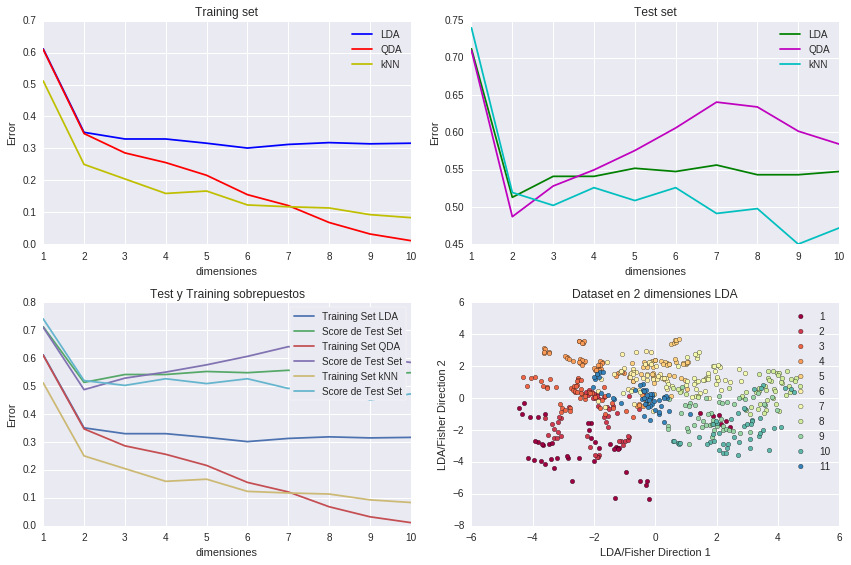

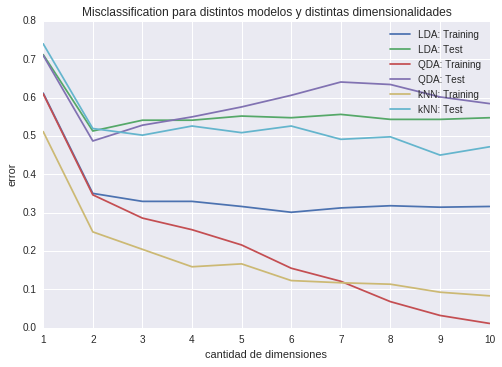

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np



def mis_clas(yhat,y): #medir el error
    miss = [ 1 if(i != j) else 0  
            for i,j in zip(yhat,y)]
    return np.mean(miss) #promedio << chequear

scores_lda =[]
scores_lda_test =[]
scores_qda =[]
scores_qda_test =[]
scores_knn =[]
scores_knn_test =[]

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)
for n in range(1,11):
    sklearn_lca = LDA(n_components=n)
    X = sklearn_lca.fit_transform(X_std,y) #dataset reducido a n dimensiones
    Xt = sklearn_lca.transform(X_std_test) 
    
    #LDA
    lda_model.fit(X,y) #modelo se ajusta a la data en espacio reducido de n dimensiones
    yhat = lda_model.predict(X)
    yhat_test = lda_model.predict(Xt)
    scores_lda.append(mis_clas(yhat,y))
    scores_lda_test.append(mis_clas(yhat_test, ytest))
    
    #QDA
    qda_model.fit(X,y)
    yhat = qda_model.predict(X)
    yhat_test = qda_model.predict(Xt)
    scores_qda.append( mis_clas(yhat,y))
    scores_qda_test.append(mis_clas(yhat_test, ytest))
    
    #kNN
    knn_model.fit(X,y)
    yhat = knn_model.predict(X)
    yhat_test = knn_model.predict(Xt)
    scores_knn.append(mis_clas(yhat,y))
    scores_knn_test.append(mis_clas(yhat_test, ytest))
    
####GRAFICOS-----------------
f, axarr = plt.subplots(2, 2, figsize=(12,8))
axarr[0, 0].plot(range(1,11), scores_lda, label="LDA", color = 'b')
axarr[0, 0].plot(range(1,11), scores_qda, label="QDA", color = 'r')
axarr[0, 0].plot(range(1,11), scores_knn, label="kNN", color = 'y')
axarr[0, 0].set_title('Training set')
axarr[0, 0].set_xlabel('dimensiones')
axarr[0, 0].set_ylabel('Error')
axarr[0, 0].legend()

axarr[0, 1].plot(range(1,11), scores_lda_test, label="LDA", color = 'g')
axarr[0, 1].plot(range(1,11), scores_qda_test, label="QDA", color = 'm')
axarr[0, 1].plot(range(1,11), scores_knn_test, label="kNN", color = 'c')
axarr[0, 1].set_title('Test set')
axarr[0, 1].set_xlabel('dimensiones')
axarr[0, 1].set_ylabel('Error')
axarr[0, 1].legend()

axarr[1, 0].plot(range(1,11), scores_lda, label="Training Set LDA")
axarr[1, 0].plot(range(1,11), scores_lda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_qda, label="Training Set QDA")
axarr[1, 0].plot(range(1,11), scores_qda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_knn, label="Training Set kNN")
axarr[1, 0].plot(range(1,11), scores_knn_test, label="Score de Test Set")
axarr[1, 0].set_title('Test y Training sobrepuestos')
axarr[1, 0].set_xlabel('dimensiones')
axarr[1, 0].set_ylabel('Error')
axarr[1, 0].legend(frameon=True)

#AYUDA VISUAL
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,12)]
for lab, col in zip(mclasses,mcolors):
    axarr[1, 1].scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
c=col)
axarr[1, 1].set_xlabel('LDA/Fisher Direction 1')
axarr[1, 1].set_ylabel('LDA/Fisher Direction 2')
axarr[1, 1].legend(loc='upper right', fancybox=True)
axarr[1, 1].set_title('Dataset en 2 dimensiones LDA')

f.tight_layout() #separar los subplot
plt.show()

#especificamente el tercer subplot, mas detallado de cerca
plt.plot(range(1,11), scores_lda, label="LDA: Training")
plt.plot(range(1,11), scores_lda_test, label="LDA: Test")
plt.plot(range(1,11), scores_qda, label="QDA: Training")
plt.plot(range(1,11), scores_qda_test, label="QDA: Test")
plt.plot(range(1,11), scores_knn, label="kNN: Training")
plt.plot(range(1,11), scores_knn_test, label="kNN: Test")
plt.title('Misclassification para distintos modelos y distintas dimensionalidades')
plt.xlabel('cantidad de dimensiones')
plt.ylabel('error')
plt.legend()
plt.show()

Para este caso de reducción de dimensionalidad mediante la técnica de LDA se puede ver que para los 3 modelos el comportamiento sobre el _training set_ a lo largo de las dimensiones es diferente al de PCA, ya que el error sobre el _training set_ no aumenta en gran medida como es el caso de PCA, excepto cuando de 2 dimensiones se pasa a 1 dimension, una recta, donde esta dimensión afecta a todos por igual ya que en 1 dimensión se pierde gran poder de los clasificadores. Sin embargo para el caso sobre el _test set_, se puede ver como el error en los 3 modelos disminuye hasta un cierto punto, 2 dimensiones.  
En el gráfico conjunto (training set y test set) se aprecia como los errores de entrenamiento y de prueba en los 3 modelos son cercanos entre si, es decir, tienen una diferencia baja, comportándose de una manera similar a lo largo de todas las dimensiones, disminuyendo el error de prueba y aumentando el error de entrenamiento, esto es ya que es el objetivo de LDA proyectar a un espacio donde el objetivo es una apta clasificación. Se puede ver que el mejor espacio para proyectar los datos con la técnica de reducción de LDA son 2 dimensiones, ya que los 3 modelos poseen un bajo $overfitting$, además de poseer un muy bajo error de prueba.

Para el _training set_, el modelo que posee menor error a lo largo de todas las dimensiones es k-NN (dominando con 5 dimensiones). Para el _test set_ el modelo que predomina con menor error a lo largo de 7 dimensiones (3 hasta 10) es k-NN, esto es ya que k-NN al ser un clasificador basado en la mayoría mas cercana se adapta perfecto a la reducción de dimensionalidad de LDA la cual consta en dejar juntos los de misma clase y separar los de clase distinta.

### PCA vs. LDA (Reducción de Dimensionalidad)

###### LDA:

<ul>
<li> El rango en el que varía los errores de entrenamiento y de pruebas es más bajo que el de PCA, presentando un mejor comportamiento de acorde a su propósito de reducción de dimensionalidad con el fin de separar las clases entre sí.</li>
<li> Menor $overfitting$ a lo largo de todas las dimensiones, representando en la diferencia entre los errores de entrenamiento y de prueba.</li>
<li> Con menos de 2 dimensiones el rendimiento decae bruscamente.</li>
<li> Los errores son mas estables, independiente del modelo y de las dimensiones a las cuales se reduzca. </li>
</ul>

###### PCA:

<ul>
<li> Errores de entrenamiento convergen al mismo rango que los errores de pruebas . </li>
<li> Errores mas altos</li>
</ul>

Para ambas técnicas de reducción el comportamiento en general sobre distintos modelos a lo largo de las dimensiones es similar. Además de que se comprobó que con ambas técnicas que se reduce el _overfitting_ a medida que disminuyen las dimensiones de los datos.

En general el método que mejor se comporta basado en el error de prueba, sobre toda las dimensiones, es el k-NN